In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sT
import altair as alt

from scipy import stats

In [2]:
covar = pd.read_csv("../data_primary/covarExted.csv").set_index("QBB_DUMMY_ID")
IgE = pd.read_csv("/Users/tkhan/ImmunoGenomics_NM/AllergenAutiAb_IgE_Sep2019/QBBIgE_IU_MR_July182019.csv").loc[:799]
igE_raw = pd.read_csv("../data_primary/clinicIgE_rawData.csv").set_index("QBB_DUMMY_ID")

In [3]:
igE_raw

,fx1,fx2,fx22,fx5,gx2,phad,t20,wx1
QBB_DUMMY_ID,,,,,,,,
SIR000037000780,0.004688,0.030764,0.158547,0.040405,0.061567,0.182508,0.029467,0.142290
SIR000037000142,0.000000,0.070241,0.129783,0.089441,0.063238,0.320504,0.016894,0.205851
SIR000037000275,0.355763,1.596741,0.403655,0.533030,0.283591,1.395833,0.129739,0.503114
SIR000037000009,0.038830,0.000000,0.147813,0.122652,0.094520,0.209529,0.000000,0.155590
SIR000037000702,0.068248,0.000000,0.166260,0.134755,0.073208,1.589408,0.391426,0.457234
...,...,...,...,...,...,...,...,...
SIR000037000061,0.047589,4.065160,0.269296,0.441743,0.240977,3.636251,0.259336,0.986090
SIR000037000281,0.010382,0.044473,0.191027,0.174846,0.213236,0.278512,0.010518,0.231748
SIR000037000282,0.010833,0.000000,0.173047,0.041801,0.081115,0.213718,0.003010,0.157595


In [4]:
igE_gradeing = pd.DataFrame(index=igE_raw.index, columns=igE_raw.columns)
for k in igE_raw.columns:
    g6 = igE_raw[k][igE_raw[k]>=100].index
    igE_gradeing.loc[g6,k] = '6'
    g5 = igE_raw[k][(igE_raw[k]>=52.5)&(igE_raw[k]<100)].index
    igE_gradeing.loc[g5,k] = '5'
    g4 = igE_raw[k][(igE_raw[k]>=17.5)&(igE_raw[k]<52.5)].index
    igE_gradeing.loc[g4,k] = '4'
    g3 = igE_raw[k][(igE_raw[k]>=3.5)&(igE_raw[k]<17.5)].index
    igE_gradeing.loc[g3,k] = '3'
    g2 = igE_raw[k][(igE_raw[k]>=0.7)&(igE_raw[k]<3.5)].index
    igE_gradeing.loc[g2,k] = '2'
    g1 = igE_raw[k][(igE_raw[k]>=0.35)&(igE_raw[k]<0.7)].index
    igE_gradeing.loc[g1,k] = '1'
    g0 = igE_raw[k][igE_raw[k]<0.35].index
    igE_gradeing.loc[g0,k] = '0'
    
    

In [5]:
igE_gradeingPV = igE_gradeing.unstack().reset_index().rename({'level_0':'allergy',0:'grading'},axis=1)

In [6]:
igE_gradeingPVCount = igE_gradeingPV.groupby(['allergy','grading']).size().reset_index().rename({0:'sampleCount'},axis=1)
igE_gradeingPVCount['sampleFrac'] = igE_gradeingPVCount.sampleCount/igE_gradeing.shape[0]

In [7]:
igE_gradeingPVCountSamplePop = igE_gradeingPVCount.pivot_table(index='allergy',columns='grading',values='sampleCount')

In [28]:
igE_gradeingPVCountSamplePop.to_csv("../tables/gradingSampleCount_1.csv")

In [9]:
gradeClass = pd.DataFrame(index=igE_gradeingPVCountSamplePop.index)
gradeClass['Negative'] = igE_gradeingPVCountSamplePop['0']
gradeClass['weakPos'] = igE_gradeingPVCountSamplePop[['1','2']].sum(axis=1)
gradeClass['strongPos'] = igE_gradeingPVCountSamplePop[['3','4','5']].sum(axis=1)
gradeClassNorm = gradeClass/igE_gradeing.shape[0]

In [10]:
gradeClassNorm

,Negative,weakPos,strongPos
allergy,,,
fx1,0.964868,0.030113,0.005019
fx2,0.814304,0.145546,0.040151
fx22,0.934755,0.058971,0.003764
fx5,0.897114,0.095358,0.005019
gx2,0.885822,0.090339,0.023839
phad,0.557089,0.314931,0.127980
t20,0.909661,0.076537,0.013802
wx1,0.752823,0.210790,0.036386


In [29]:
gradeClassNorm.to_csv("../tables/gradingSampleCount_2.csv")

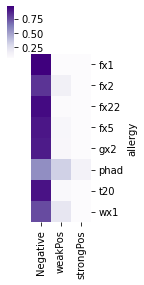

In [24]:
sns.clustermap(gradeClassNorm,vmin=0.05,cmap="Purples",col_cluster=False,row_cluster=False,figsize=(2,4))

In [11]:
gradeClass

,Negative,weakPos,strongPos
allergy,,,
fx1,769.0,24.0,4.0
fx2,649.0,116.0,32.0
fx22,745.0,47.0,3.0
fx5,715.0,76.0,4.0
gx2,706.0,72.0,19.0
phad,444.0,251.0,102.0
t20,725.0,61.0,11.0
wx1,600.0,168.0,29.0


In [14]:
phadGrading = pd.DataFrame(index= igE_gradeing.index,columns=['Negative','weakPos','strongPos'])
phadGrading.loc[igE_gradeing[igE_gradeing.phad=='0'].index,'Negative'] = 1
phadGrading.loc[igE_gradeing[igE_gradeing.phad.isin(['1','2'])].index,'weakPos'] = 1
phadGrading.loc[igE_gradeing[igE_gradeing.phad.isin(['3','4','5'])].index,'strongPos'] = 1

In [19]:
phadGrading = phadGrading.fillna(0)
phadGrading.sum()

Negative     444
weakPos      251
strongPos    102
dtype: int64

In [21]:
phadGrading.to_csv("../data_curated/phad_grading.csv")

In [22]:
pd.read_csv("../data_curated/phad_grading.csv")

,QBB_DUMMY_ID,Negative,weakPos,strongPos
0,SIR000037000780,1,0,0
1,SIR000037000142,1,0,0
2,SIR000037000275,0,1,0
3,SIR000037000009,1,0,0
4,SIR000037000702,0,1,0
...,...,...,...,...
792,SIR000037000061,0,0,1
793,SIR000037000281,1,0,0
794,SIR000037000282,1,0,0
795,SIR000037000063,0,1,0


In [25]:
fx2Grading = pd.DataFrame(index= igE_gradeing.index,columns=['Negative','weakPos','strongPos'])
fx2Grading.loc[igE_gradeing[igE_gradeing.fx2=='0'].index,'Negative'] = 1
fx2Grading.loc[igE_gradeing[igE_gradeing.fx2.isin(['1','2'])].index,'weakPos'] = 1
fx2Grading.loc[igE_gradeing[igE_gradeing.fx2.isin(['3','4','5'])].index,'strongPos'] = 1
fx2Grading = fx2Grading.fillna(0)
fx2Grading.sum()

Negative     649
weakPos      116
strongPos     32
dtype: int64

In [26]:
fx2Grading.to_csv("../data_curated/fx2_grading.csv")